# Contaminación de los óceanos por plástico 🌊🐠🐡🐳🦑🦐🐢

## About this file

### Year: Año
### Accumulated ocean plastic: Microplastics (<0.5cm): Plástico acumulado en los océanos: Microplásticos (<0,5cm)
### Annual temperature mean: Temperatura media anual 
### Entity: País

In [1]:
#importar librerias
import statistics as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se leen archivos y asignan a un dataset
ocean_pollution2 = pd.read_csv("ocean-plastic-waste-per-capita-vs-gdp.csv")
ocean_pollution = pd.read_csv('cities_air_quality_water_pollution.18-10-2021.csv')
ocean_temperature = pd.read_csv('NASA GLOBAL LAND-OCEAN TEMPERATURE INDEX.csv')


display(ocean_pollution2.head())
display(ocean_pollution.tail())
display(ocean_temperature.head())

,Entity,Code,Year,Mismanaged plastic waste to ocean per capita (kg per year),"GDP per capita, PPP (constant 2011 international $)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,NaN


,Entity,Code,Year,Accumulated ocean plastic: Microplastics (<0.5cm)
298,Emissions stop in 2020,NaN,2046,1380100
299,Emissions stop in 2020,NaN,2047,1405000
300,Emissions stop in 2020,NaN,2048,1429400
301,Emissions stop in 2020,NaN,2049,1453500
302,Emissions stop in 2020,NaN,2050,1477200


,year,Annual_mean,Lowess(5)
0,1880,-0.16,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24


In [3]:
# Limpiar información de ocean_pollution
ocean_pollution = ocean_pollution[(ocean_pollution.Year >= 2000) & (ocean_pollution.Year <= 2020) & (ocean_pollution.Entity == 'Emissions level to 2020')]
ocean_pollution = ocean_pollution.drop(['Entity', 'Code'], axis=1)
ocean_pollution.head() 

,Year,Accumulated ocean plastic: Microplastics (<0.5cm)
151,2000,154500
152,2001,166900
153,2002,180100
154,2003,194100
155,2004,209000


In [4]:
# Limpiar información de ocean_temperature
ocean_temperature = ocean_temperature[(ocean_temperature.year >= 2000)&(ocean_temperature.year <= 2020)]
ocean_temperature = ocean_temperature.rename(columns={'Annual_mean': 'Annual temperature mean', 'year':'Year'})
ocean_temperature = ocean_temperature.drop(['Lowess(5)'], axis=1)
ocean_temperature.head()

,Year,Annual temperature mean
120,2000,0.39
121,2001,0.53
122,2002,0.63
123,2003,0.62
124,2004,0.53


In [5]:
# Combinando ocean_temperature con ocean_pollution
# Unimos las dos tablas relacionadas por Year, se estable el argumento on = a Year
oceanPolTemp = pd.merge(ocean_pollution, ocean_temperature, on='Year')
oceanPolTemp.head()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Annual temperature mean
0,2000,154500,0.39
1,2001,166900,0.53
2,2002,180100,0.63
3,2003,194100,0.62
4,2004,209000,0.53


In [6]:
oceanPolTemp['Entity'] = ocean_pollution2['Entity']
oceanPolTemp.head()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Annual temperature mean,Entity
0,2000,154500,0.39,Abkhazia
1,2001,166900,0.53,Afghanistan
2,2002,180100,0.63,Afghanistan
3,2003,194100,0.62,Afghanistan
4,2004,209000,0.53,Afghanistan


In [7]:
# Tamaño del DataFrame (filas, columnas)
oceanPolTemp.shape

(21, 4)

In [8]:
# información de columnas
oceanPolTemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               21 non-null     int64  
 1   Accumulated ocean plastic: Microplastics (<0.5cm)  21 non-null     int64  
 2   Annual temperature mean                            21 non-null     float64
 3   Entity                                             21 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 840.0+ bytes


In [9]:
# muestra valor promedio, la desviación estándar, el valor máximo
# el valor mínimo, el 35%, el 50%, el 75% de cada columna de datos
# numéricos
oceanPolTemp.describe()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Annual temperature mean
count,21.000000,21.000000,21.000000
mean,2010.000000,338833.333333,0.710952
std,6.204837,136294.458190,0.174124
min,2000.000000,154500.000000,0.390000
25%,2005.000000,224700.000000,0.620000
50%,2010.000000,318500.000000,0.660000
75%,2015.000000,439800.000000,0.850000
max,2020.000000,594000.000000,1.020000


In [10]:
oceanPolTemp.isnull().sum()

Year                                                 0
Accumulated ocean plastic: Microplastics (<0.5cm)    0
Annual temperature mean                              0
Entity                                               0
dtype: int64

In [11]:
oceanPolTemp.drop(0, axis=0)

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Annual temperature mean,Entity
1,2001,166900,0.53,Afghanistan
2,2002,180100,0.63,Afghanistan
3,2003,194100,0.62,Afghanistan
4,2004,209000,0.53,Afghanistan
5,2005,224700,0.68,Afghanistan
6,2006,241400,0.63,Afghanistan
7,2007,259200,0.66,Afghanistan
8,2008,277900,0.54,Afghanistan
9,2009,297700,0.65,Afghanistan
10,2010,318500,0.72,Afghanistan


In [12]:
# Año con mayor temperatura
oceanPolTemp.sort_values(by='Annual temperature mean', ascending=False).head()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Annual temperature mean,Entity
20,2020,594000,1.02,Albania
16,2016,467800,1.02,Afghanistan
19,2019,560200,0.98,Albania
17,2017,497200,0.92,Africa
15,2015,439800,0.90,Afghanistan


In [13]:
# Año con menor temperatura
oceanPolTemp.sort_values(by='Annual temperature mean', ascending=False).tail()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Annual temperature mean,Entity
11,2011,340400,0.61,Afghanistan
8,2008,277900,0.54,Afghanistan
1,2001,166900,0.53,Afghanistan
4,2004,209000,0.53,Afghanistan
0,2000,154500,0.39,Abkhazia


In [14]:
# Año con mayor plástico 
oceanPolTemp.sort_values(by='Accumulated ocean plastic: Microplastics (<0.5cm)', ascending=False).head()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Annual temperature mean,Entity
20,2020,594000,1.02,Albania
19,2019,560200,0.98,Albania
18,2018,528000,0.85,Akrotiri and Dhekelia
17,2017,497200,0.92,Africa
16,2016,467800,1.02,Afghanistan


In [15]:
# Año con menor contaminación
oceanPolTemp.sort_values(by='Accumulated ocean plastic: Microplastics (<0.5cm)', ascending=False).tail()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Annual temperature mean,Entity
4,2004,209000,0.53,Afghanistan
3,2003,194100,0.62,Afghanistan
2,2002,180100,0.63,Afghanistan
1,2001,166900,0.53,Afghanistan
0,2000,154500,0.39,Abkhazia


In [16]:
# Se suma la temperatura media, se agrupa por año y pais 
EntiTemp = oceanPolTemp.groupby(['Year','Entity'])['Annual temperature mean'].sum().sort_values().reset_index().head(20)
EntiTemp.head()

,Year,Entity,Annual temperature mean
0,2000,Abkhazia,0.39
1,2001,Afghanistan,0.53
2,2004,Afghanistan,0.53
3,2008,Afghanistan,0.54
4,2011,Afghanistan,0.61


In [17]:
# Se suma el plástico acumulado en los oceanos, se agrupa por año y pais 
EntiPol = oceanPolTemp.groupby(['Year','Entity'])['Accumulated ocean plastic: Microplastics (<0.5cm)'].sum().sort_values().reset_index().tail(20)
EntiPol.head()

,Year,Entity,Accumulated ocean plastic: Microplastics (<0.5cm)
1,2001,Afghanistan,166900
2,2002,Afghanistan,180100
3,2003,Afghanistan,194100
4,2004,Afghanistan,209000
5,2005,Afghanistan,224700


Text(0, 0.5, 'Annual temperature mean')

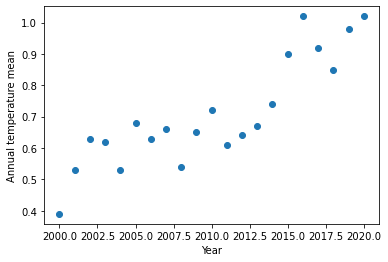

In [18]:
# 
plt.scatter(oceanPolTemp['Year'], oceanPolTemp['Annual temperature mean'])
plt.xlabel('Year')
plt.ylabel('Annual temperature mean')

Text(0, 0.5, 'Accumulated ocean plastic: Microplastics (<0.5cm)')

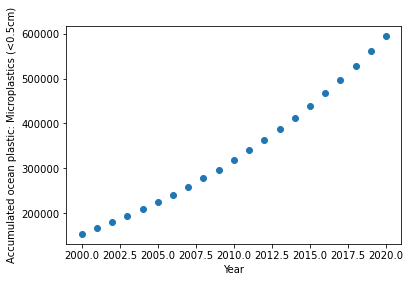

In [19]:
plt.scatter(oceanPolTemp['Year'], oceanPolTemp['Accumulated ocean plastic: Microplastics (<0.5cm)'])
plt.xlabel('Year')
plt.ylabel('Accumulated ocean plastic: Microplastics (<0.5cm)')

In [20]:
x = oceanPolTemp['Year']
y1 = oceanPolTemp['Annual temperature mean']
y2 = oceanPolTemp['Accumulated ocean plastic: Microplastics (<0.5cm)']

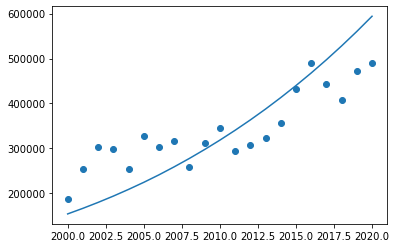

In [21]:
plt.scatter(x,y1*480948.913992034)
plt.plot(x,y2)

In [22]:
# Media - Media ponderada - Mediana - Moda (de los niveles de contaminacion) 
contaminacion = oceanPolTemp['Accumulated ocean plastic: Microplastics (<0.5cm)']
contaminacion.sort_values()
media_contaminacion = contaminacion.sum() / 20
media_ponderada_contaminacion = contaminacion[6:16].sum()/10
if len(contaminacion) % 2 == 0:
    mediana_contaminacion = ((oceanPolTemp['Accumulated ocean plastic: Microplastics (<0.5cm)'][len(contaminacion)/2] \
                             + oceanPolTemp['Accumulated ocean plastic: Microplastics (<0.5cm)'][len(contaminacion)/2 + 1]) / 2)
else:
    mediana_contaminacion = oceanPolTemp['Accumulated ocean plastic: Microplastics (<0.5cm)'][(len(contaminacion) + 1)/2]
moda_contaminacion = stats.mode(contaminacion)

print(f' la contaminación media o promedio es: {media_contaminacion}')
print(f' la media ponderada de contaminación es: {media_ponderada_contaminacion}')
print(f' la mediana en la contaminación es: {mediana_contaminacion}')
print(f' la moda en la contaminación es: {moda_contaminacion}')

 la contaminación media o promedio es: 355775.0
 la media ponderada de contaminación es: 333900.0
 la mediana en la contaminación es: 340400
 la moda en la contaminación es: 154500


In [23]:
# Media - Media ponderada - Mediana - Moda (de la temperatura) 
temperature = oceanPolTemp['Annual temperature mean']
temperature.sort_values()
media_temperature = temperature.sum() / 20
media_ponderada_temperature = temperature[6:16].sum()/10
if len(contaminacion) % 2 == 0:
    mediana_temperature = (oceanPolTemp['Annual temperature mean'][len(contaminacion)/2] \
                             + oceanPolTemp['Annual temperature mean'][len(contaminacion)/2 + 1]) / 2
else:
    mediana_temperature = oceanPolTemp['Annual temperature mean'][(len(contaminacion) + 1)/2]
moda_temperature = stats.mode(temperature)

print(f' la temperatura media o promedio es: {media_temperature}')
print(f' la media ponderada de temperatura es: {media_ponderada_temperature}')
print(f' la mediana en la temperatura es: {mediana_temperature}')
print(f' la moda en la temperatura es: {moda_temperature}')

 la temperatura media o promedio es: 0.7464999999999999
 la media ponderada de temperatura es: 0.676
 la mediana en la temperatura es: 0.61
 la moda en la temperatura es: 0.53


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13432/2287415501.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(axis[0].get_xticklabels())
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13432/2287415501.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(axis[1].get_xticklabels())


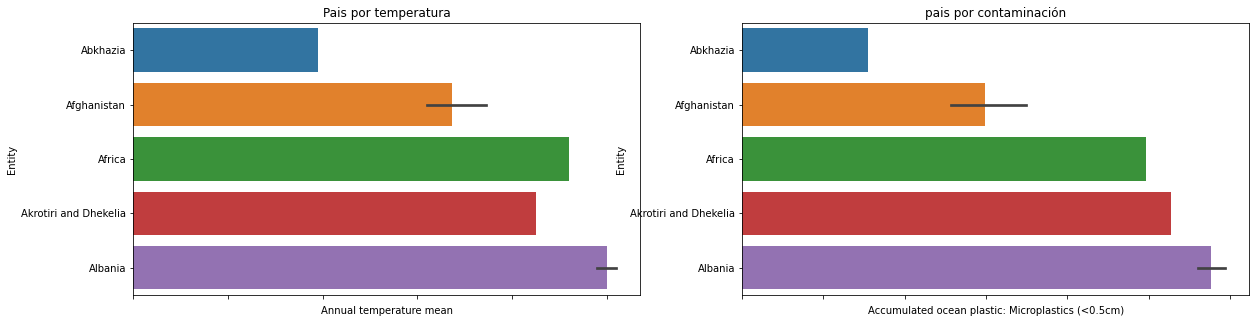

In [24]:
figure,axis = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x='Annual temperature mean', y='Entity', data=oceanPolTemp,ax=axis[0])
axis[0].set_xticklabels(axis[0].get_xticklabels())
axis[0].set_title('Pais por temperatura')
sns.barplot(x='Accumulated ocean plastic: Microplastics (<0.5cm)', y='Entity', data=oceanPolTemp,ax=axis[1])
axis[1].set_xticklabels(axis[1].get_xticklabels())
axis[1].set_title('pais por contaminación')
plt.show()